In [1]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.0


In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\bank-full.csv")  # Replace with your actual file path
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


Accuracy: 0.8935087913303107
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



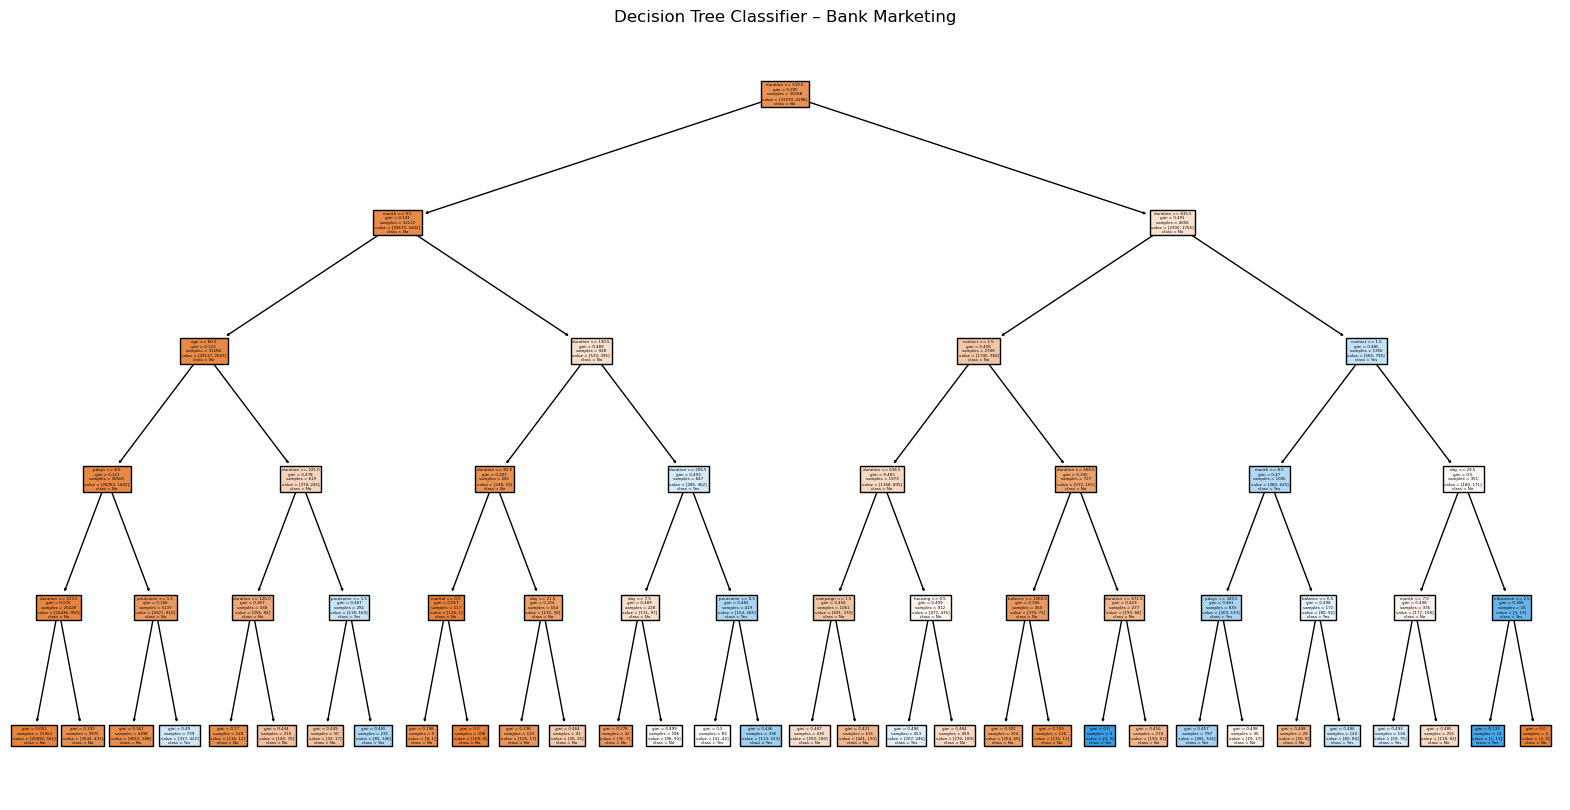

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Apurva HG\anaconda3\share\jupyter\lab\bank-full.csv", sep=';')  # Replace with your actual file path
df.columns = df.columns.str.strip().str.lower()
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'poutcome', 'y']
le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Column '{col}' not found in DataFrame.")
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=list(X.columns), class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Classifier – Bank Marketing")
plt.show()